***Генетический алгоритм, лабораторная***


**Введение**
---

**Коммивояжёр** (фр. commis voyageur) — бродячий торговец. **Задача коммивояжёра** — одна из самых известных задач комбинаторной оптимизации. Важная задача транспортной логистики, отрасли, занимающейся планированием транспортных перевозок. Коммивояжёру, чтобы распродать нужные и не очень нужные в хозяйстве товары, следует объехать **n** городов и в конце концов вернуться в исходный город. Требуется определить наиболее выгодный маршрут объезда. В качестве меры выгодности маршрута (точнее говоря, невыгодности) может служить суммарное время в пути, суммарная стоимость дороги, или, как в данной работе длина маршрута.

Задача коммивояжёра может быть решена перебором всех вариантов объезда и выбором оптимального. Проблема заключается в том, что количество возможных маршрутов очень быстро возрастает с ростом **n** (оно равно **n!** — количеству способов упорядочения пунктов). К примеру, для 100 пунктов количество вариантов будет представляться 158-значным числом! Мощная ЭВМ, способная перебирать миллион вариантов в секунду, будет биться с задачей на протяжении примерно $3⋅10^{144}$ лет.

Доказано, что не существует алгоритма решения, имеющего степенную сложность (то есть требующего порядка $n^a$ операций для некоторого **a**) — любой алгоритм будет хуже.

В таком случае следует отказаться от попыток отыскать точное решение задачи коммивояжёра и сосредоточиться на поиске приближённого — пускай не оптимального, но хотя бы близкого к нему. В виду большой практической важности задачи полезными будут и приближённые решения.

**Генетический алгоритм** – это разновидность эволюционного алгоритма, который используется для решения задач оптимизации и моделирования путём случайного подбора и комбинирования параметров. Идея генетических алгоритмов основана на эволюционной теории Чарльза Дарвина. Этот алгоритм симулирует процесс естественного отбора, когда более сильные особи из популяции переживают более слабых и производят следующее поколение особей. Данный алгоритм использует эволюционные принципы наследственности, изменчивости и естественного отбора.

**Постановка задачи.** Данная лабораторная работа посвящена рассмотрению решения геометрической задачи коммивояжера на основе генетического алгоритма. На вход данному алгоритму подается некоторое количество городов и их координаты **X**, **Y** на плоскости. Алгоритм должен построить кратчайший маршрут, проходящий через все города с возвращением в исходную точку.

Расстояние между городами считается по евклидовой метрике.

Дополнительные материалы
---

1. [В. Г. Cпицын, Ю. Р. Цой ПРИМЕНЕНИЕ ГЕНЕТИЧЕСКОГО АЛГОРИТМА
ДЛЯ РЕШЕНИЯ ЗАДАЧ ОПТИМИЗАЦИИ](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf)
2. Видео лекция по генетическому алгоритму:  [Генетический алгоритм (Кирсанов М.Н)](https://www.youtube.com/watch?v=ttsZV01aYYU).
3. Учебник: [Люк С. Основы метаэвристик. Перевод.](http://qai.narod.ru/GA/metaheuristics.html)
4. Видео 2: [Видео 2. Генетический алгоритм для задачи о коммивояжера](https://www.youtube.com/watch?v=ufAHNtZkO_A&ab_channel=NataliiaTuzhilkina)

**Постановка задачи**
---

Зададим первоначальные условия задачи:

1) Выберем количество городов.

2) Расположим города случайным образом на плоскости.

In [128]:
import numpy as np

number_cities = 15 # количество городов
list_cities = np.random.random([number_cities, 2]) # спискок координат городов

Выведем изображение с местоположением городов.

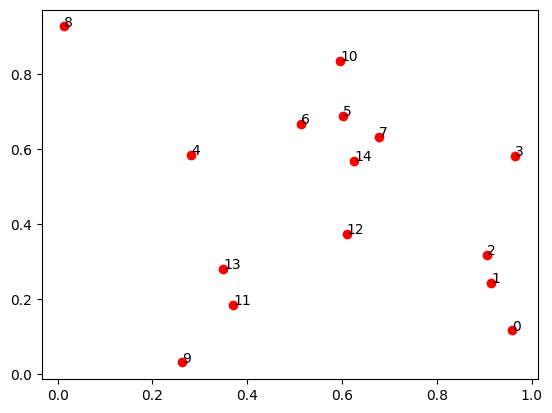

In [129]:
import matplotlib.pyplot as plt

# нарисуем города
plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

# пронумеруем города
for i in range(number_cities):
  plt.annotate(i, (list_cities[i][0], list_cities[i][1]))
plt.show()

**Маршрут**
---

**Маршрут** в данной реализации является массивом. Данный массив содержит number_cities элементов, каждый элемент массива это номер города. Маршрут проходит через города в соответствии с расположением городов в массиве и возвращается в стартовый город (первый город в массиве).

Где number_cities - это количество городов.

Ниже приведен пример построения кратчайшего маршрута проходящего через 10 точек:

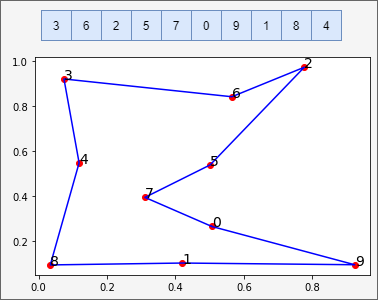

**Функция отрисовки маршрута**

Ниже представлена функция, позволяющая вывести маршрут в виде изображения. На данном изображении можно увидеть местоположение городов, номера городов и маршрут.

На вход данной функции подается список городов и маршрут.

In [130]:
# нарисовать маршрут
def route_image(list_cities, route):
  # пронумеруем города
  for i in range(number_cities):
    plt.annotate(i, (list_cities[i][0], list_cities[i][1]), fontsize=14)

  # нарисуем города
  plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

  # нарисуем маршрут
  x = [list_cities[route[-1]][0]]
  y = [list_cities[route[-1]][1]]
  for i in range(len(route)):
    x.append(list_cities[route[i]][0])
    y.append(list_cities[route[i]][1])
  plt.plot(x, y, c='blue')

  # выведем изображение
  plt.show()

Сгенерируем и выведем случайный маршрут.

Маршрут: [13  4 11 12  3  2  6  9  9  3  9 10  9 11  6]


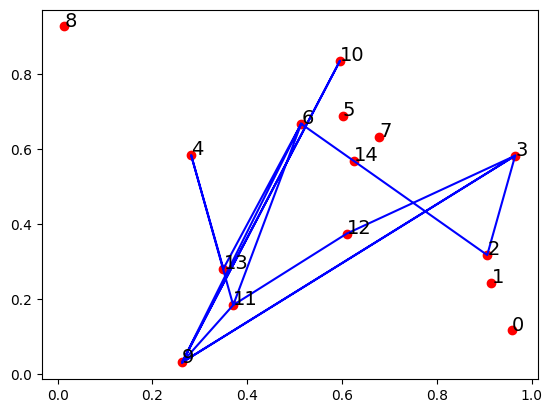

In [131]:
route = np.random.randint(number_cities, size=number_cities) # сгенерированный маршрут
print("Маршрут:", route)
route_image(list_cities, route)

Из рисунка можно увидеть, что при генерации маршрута случайным образом может возникнуть ситуация, когда часть городов останутся пропущенными или посещенными несколько раз.

**Оценка качества маршрута**
---

**Функция оценки качества**

Данная функция позволяет оценить качество построенного маршрута. В данной постановке задачи расстояние между городами и длина маршрута считаются по евклидовой метрике. Также будем давать штраф за не посещение города, т.к. по условию задачи необходимо посетить все города, а маршрут может не содержать некоторых городов.

Формула евклидова расстояния:
$$d(p, q)=\sqrt{\sum_{i=1}^n {(p_i - q_i)}^2},$$

где ***p*** и ***q*** - координаты городов.

На вход данной функции подается список городов (list_cities) и маршрут (route).

**Задание**: Вычислите длину маршрута по евклидовой метрике.

In [132]:
def route_length(list_cities, route):
  # штраф за не посещение города
  length_penalty = 0
  for i in range(len(list_cities)):
    if i not in route:
      length_penalty += 10
  
  # длина маршрута
  length = 0
  for i in range(len(route)-1):
    p, q = list_cities[route[i]], list_cities[route[i+1]]
    length += np.sqrt(np.sum(np.square(p-q)))

  # YOUR CODE HERE

  return length_penalty + length

Оценим качество ранее сгенерированного маршрута и выведем его.

Качество маршрута:  67.1413351569527
Маршрут:  [13  4 11 12  3  2  6  9  9  3  9 10  9 11  6]


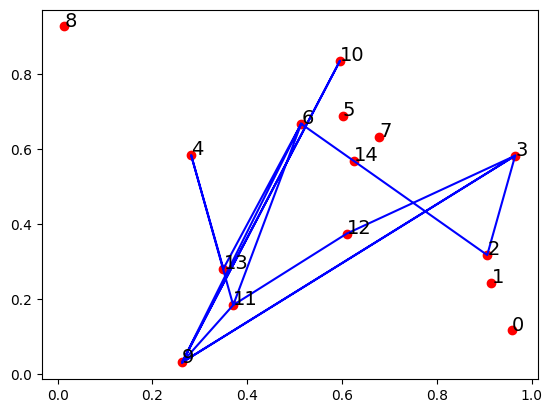

In [133]:
print("Качество маршрута: ", route_length(list_cities, route))
print("Маршрут: ", route)
route_image(list_cities, route)

**Генетический алгоритм**
---

Процесс обучения генетического алгоритма можно разделить на 4 этапа:
1. Создание начальной популяции
2. Оценка качества особей
3. Отбор наиболее сильных решений
4. Мутация и/или скрещивание. Формирование нового поколения

Основные этапы генетического алгоритма представлены на рисунке ниже:

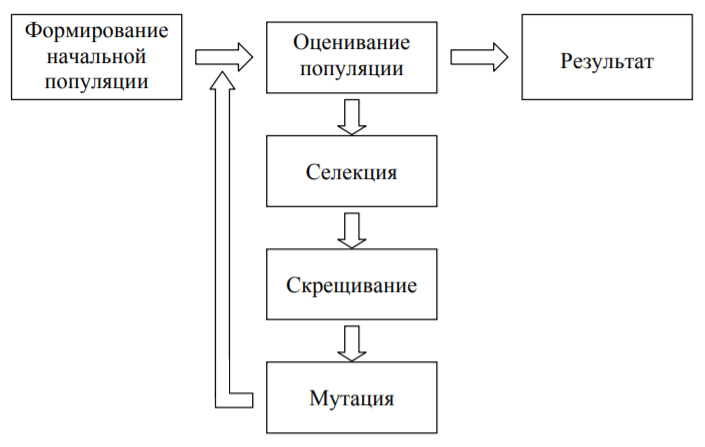

Процесс начинается с набора **особей** (например, случайные маршруты), такой набор называется **популяцией**. Каждая **особь** — это решение задачи, которая была поставлена. Особь характеризуется набором параметров (переменных), которые называют **генами** (например, номера городов). Гены объединены в одну строку и формируют **хромосому** — решение задачи.

**1. Создание начальной популяции**

Создадим начальную популяцию из случайных маршрутов. Случайный маршрут, как правило, является плохим решением данной задачи. Повторное посещение городов в данной поставноке задачи не требуется. Генерация случайных маршрутов без повторного посещения городов позволит улучшить их качество, от того на сколько качественный маршруты будут сгенерированы в начальной популяции зависит скорость схождения алгоритма и конечное качество решения.

Сгенерируем несколько случайных маршрутов без повторного посещения городов и выберем лучший.

In [134]:
number_routes = 100 # количество маршрутов (особей)

# генерация маршрутов без повторений
routes = []
for i in range(number_routes):
  routes.append(np.random.permutation(number_cities))
routes = np.array(routes)

**2. Оценка качества особей. Функция приспособленности.**

Целью данной операции является оценка качества особей для последующего отбора наиболее приспособленных из них.

На вход данной функции подается список особей. Данная функция оценивает и выводит качество всех особей (качество всех маршрутов).

**Задание**: рассчитайте приспособленность каждой особи в популяции (список routes) и запишите полученный результат в список (length_penalty).

In [135]:
# качество особей (маршрутов)
def quality(list_cities, routes):
  # проведем оценку маршрутов
  length_penalty = np.zeros([len(routes)])

  # YOUR CODE HERE

  for i, route in enumerate(routes):
    length_penalty[i] = route_length(list_cities,route)
    
  return length_penalty

Оценим начальную популяцию и найдем самый короткий и качественный сгенерированный маршрут. Затем выведем его.

Маршрут:  [ 9  0  1  2 11 13  8 14 12  3  5  6  4  7 10]
Качество маршрута: 4.939734069203906


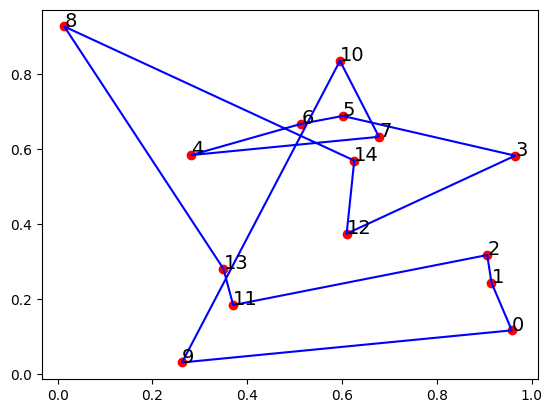

In [136]:
length_penalty = quality(list_cities, routes)

min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Случайный маршрут, построенный без повторного посещения городов, в среднем значительно лучше полностью случайного маршрута.

При постановке задачи с малым количествов городов (например 8) и достаточном количестве сгенерированных маршрутов (например 500), решение задачи может быть найдено уже на данном этапе. При решении задачи с большим количеством городов, требуется использование других подходов. Так можно использовать полный перебор вариантов с проверкой всех возможных решений, но данный подход является ресурсозатратным и может не позволить найти решение задачи за приемлемое время. Использование генетического алгоритма может ускорить поиск решения данной задачи, но не гарантирует нахождения решения.

**3. Отбор наиболее сильных решений. Селекция**

Идея селекции особей заключается в том, чтобы отобрать наиболее сильные решения и передать их гены в следующее поколение, на основе отсева наиболее слабых особей из популяции.

В данном случае мы не будем выделять селекцию как отдельный этап, в данной реализации генетического алгоритма на каждой итерации мы будем заменять одну наименее приспособленную особь на новую. Новая особь получается в результате операции скрещивания или мутации случайных особей популяции.

**4.1. Мутация**

Операция мутация особи заключается в случайном изменении ее генов, например: перестановка городов местами, генерация новой случайной части маршрута и т.д. Мутация особи может как улучшить существующий маршрут, так и ухудшить его. Но делая случайные изменения и сохраняя положительные мутации мы можем постепенно найти более качественное решение задачи.

На изображении ниже можно увидеть пример положительной мутации.

Пример положительной мутации особи (маршрута):
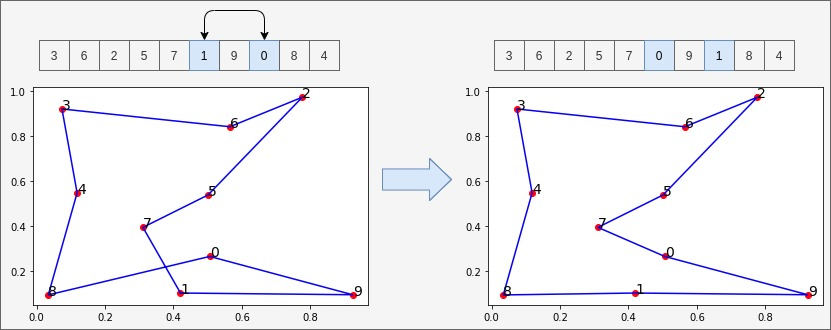

**Задание**: реализуйте операцию мутации (можете попробовать предложить свой вариант).

In [137]:
# мутация маршрута
def mutation(route, p_mut = 0.3):

  new_route = route.copy()
  if np.random.rand() < p_mut:
        i, j = np.random.choice(len(new_route), 2, replace=False)
        new_route[i], new_route[j] = new_route[j], new_route[i]
  return new_route

**4.2. Скрещивание**

Операция скрещивания заключается в создании новой особи на основе двух особей родителей, например: объединение двух случайных участков геномов, перенос некоторой последовательности генов из одной особи в другую и т.д. Целью данной операции является объединение положительных качеств особей родителей, которое позволит получить новую особь с более качественным геномом.

Пример успешного скрещивания двух особей (скрещивание маршрутов):

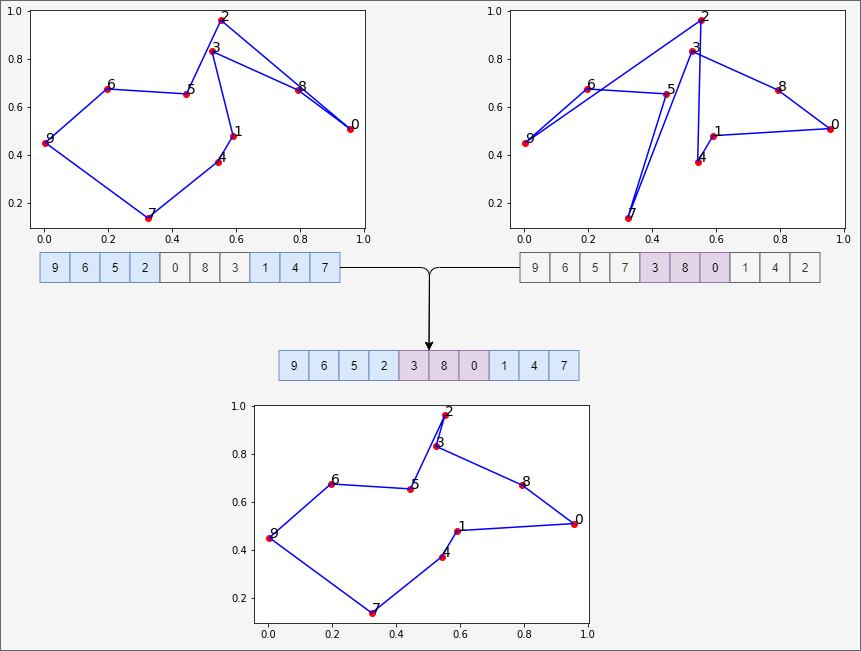

**Задание**: реализуйте операцию скрещивания (можете попробовать предложить свой вариант).

In [138]:
def crossbreeding(route_1, route_2):
    n = len(route_1)
    child = [-1] * n


    cut1, cut2 = sorted(np.random.choice(n, size=2, replace=False))
    child[cut1:cut2+1] = route_1[cut1:cut2+1]

    mapping = {route_2[i]: route_1[i] for i in range(cut1, cut2+1)}


    for i in range(n):
        if child[i] == -1: 
            cand = route_2[i]

            while cand in mapping:
                cand = mapping[cand]
            child[i] = cand

    return np.array(child)


Операции мутации и скрещивания могут быть адаптированы под условия данной задачи. Вы можете предложить свои варианты. Например, данные операции можно реализовать таким образом, что в результате будет получен маршрут без повторения городов, что увеличит вероятность успешности данных операций.

Реализуем генетический алгоритм.

**Задание**: примените основные операции генетического алгоритма.

Итерация: 0
Маршрут:  [ 9  0  1  2 11 13  8 14 12  3  5  6  4  7 10]
Качество маршрута: 4.939734069203906


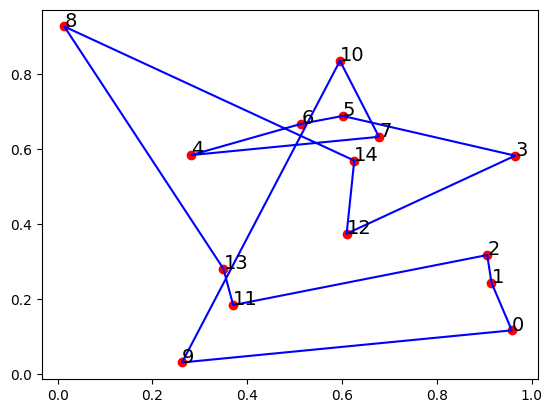




Итерация: 4000
Маршрут:  [10  7  5  6 13  9 11 12 14  3  2  1  0  4  8]
Качество маршрута: 3.8546692644083627


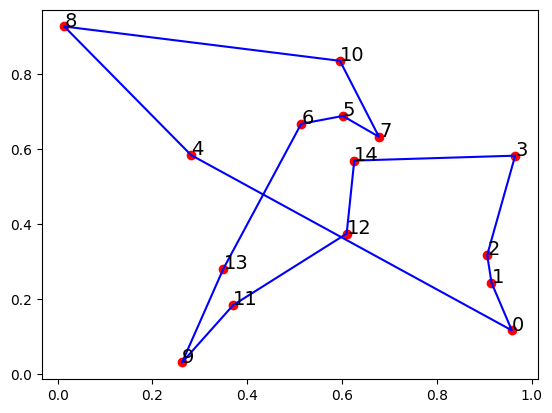




Итерация: 8000
Маршрут:  [10  7  5  6 13  9 11 12 14  3  2  1  0  4  8]
Качество маршрута: 3.8546692644083627


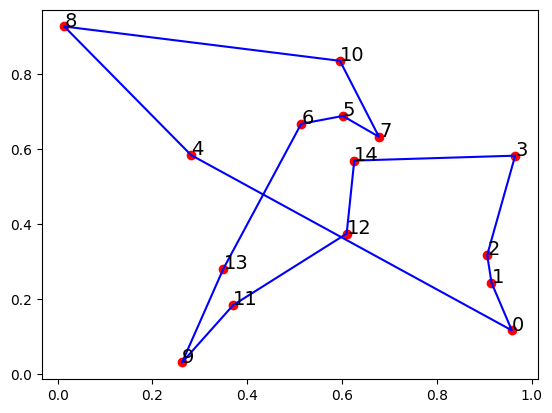




Итерация: 12000
Маршрут:  [10  7  5  6 13  9 11 12 14  3  2  1  0  4  8]
Качество маршрута: 3.8546692644083627


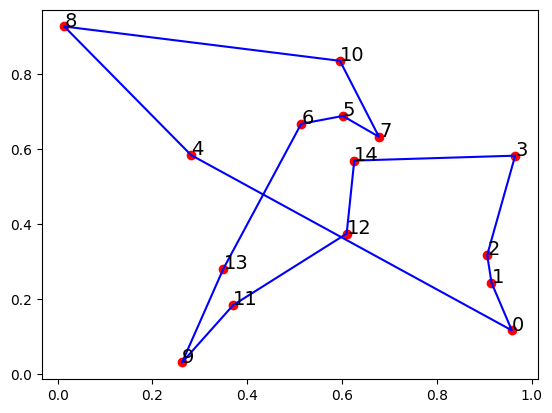




Итерация: 16000
Маршрут:  [10  7  5  6 13  9 11 12 14  3  2  1  0  4  8]
Качество маршрута: 3.8546692644083627


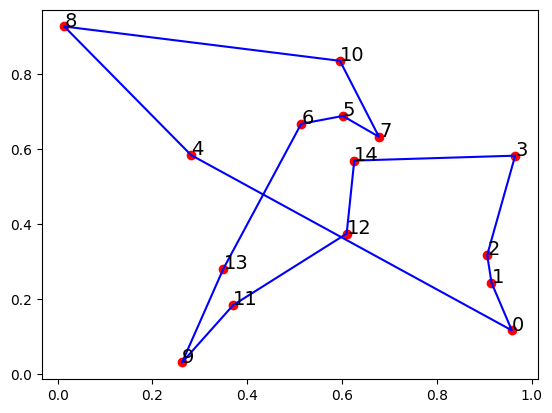

In [139]:
from copy import deepcopy as dcopy

number_iterations = 20000 # количество итераций улучшения

# 2. Оценка качества особей. Функция приспособленности.
# length_penalty - список оценок всех особей популяции
length_penalty = quality(list_cities, routes)

for i in range(number_iterations):
  # отсортируем особи в порядке от наиболее приспособленных к наименее приспособленным
  sort_indx = length_penalty.argsort() # индексы отсортированных элементов
  length_penalty = length_penalty[sort_indx] # меняем оценки качества особей местами в соответствии с отсортированными индексами
  routes = routes[sort_indx] # меняем особи местами в соответствии с отсортированными индексами

  # выбираем особи для операций мутации и скрещивания
  route_index_1 = np.random.randint(number_routes)
  route_index_2 = np.random.randint(number_routes)

  # 3. Отбор наиболее сильных решений. Селекция
  # (упрощенный вариант селекции с заменой одной наименее приспособленной особи на новую)
  if np.random.random()<0.5:
    # 4.1 мутация
    routes[-1] =  mutation(routes[route_index_1])
  else:
    # 4.2 скрещивание
    routes[-1] = crossbreeding(routes[route_index_1], routes[route_index_2])

  # 2. Оценка качества особей. Функция приспособленности.
  length_penalty[-1] = route_length(list_cities, routes[-1])

  # вывод промежуточного результата
  if i%(number_iterations//5) == 0:
    print("Итерация:", i)
    print("Маршрут: ", routes[0])
    print("Качество маршрута:", route_length(list_cities, routes[0]))
    route_image(list_cities, routes[0])
    print('\n\n')

Выведем изображение итогового маршрута.

Маршрут:  [10  7  5  6 13  9 11 12 14  3  2  1  0  4  8]
Качество маршрута: 3.8546692644083627


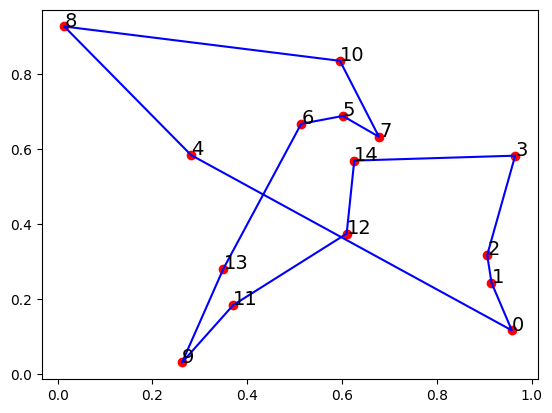

In [140]:
length_penalty = quality(list_cities, routes)

min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Генетический алгоритм позволяет решать множество различных оптимизационных и других задач. В результате данной работы мы рассмотрели реализацию данного алгоритма для задачи о коммивояжере.

Чтобы увеличить скорость и качество работы, генетический алгоритм может быть адаптирован под условия конкретной задачи, так можно изменять реализацию: генерации первого поколения, мутации, скрещивания, селекции, функции приспособленности, выбор особей для мутации и скрещивания, сохранение наиболее приспособленных особей без изменений (элитные особи) и многое другое.

Вопросы к лабораторной работе
---

Для закрепления изученного материала ответьте на приведенные ниже вопросы (вы можете воспользоваться [**основными**](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf) и **дополнительными материалами** (см. выше):

1. Охарактеризуйте понятие **особи** и **популяции** в генетическом алгоритме?

Особь - одно возможное решение задачи - в данном случае - путь <br>
Популяция - набор особей, существующих на конкретной итерации (качество оценивается по приспособленности) 

2. Опишите основные этапы генетического алгоритма.

| Шаг                             |                                                                                                                       |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| 1. Инициализация                | Сгенерировать начальную популяцию (случайно или используя эвристику).                                                           |
| 2. Оценка (fitness)             | Посчитать функцию приспособленности для каждой особи.                                                                           |
| 3. Селекция (отбор родителей)   | Выбрать особей, которым позволено дать потомство                                       |
| 4. Генерация потомков           | *Скрещивание* (crossover) — комбинируем гены пары родителей, <br> *Мутация* — случайно изменяем гены, поддерживая разнообразие. |
| 5. Формирование новой популяции | Собрать N особей из потомков и, при необходимости, части «элиты» предыдущего поколения.                                         |
| 6. Проверка критерия останова   | Достигнут максимум поколений, целевая точность или нет улучшения → стоп; иначе — вернуться к шагу 2.                            |


3. Какие типы задач можно решать с помощью генетического алгоритма? Приведите примеры таких задач.

Комбинаторные задачи - задачи коммивояжера, планирование расписаний

Нелинейная непрерывная оптимизация -подбор коэффициентов регрессии без градиента

Поиск гиперпараметров модели